In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
sum = np.zeros((49,49))
for i in range(len(data_generators)):
    print(i)
    for batch in data_generators[i]:
        sum[i] += tf.reduce_sum(tf.nn.softmax(model.predict(batch[0])), axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [27]:
A = np.loadtxt('str_induced_matrix')

In [33]:
A

array([[8.38325043e+01, 1.27435109e-04, 8.46239567e-01, ...,
        8.51152174e-04, 1.85059816e-05, 9.11285635e-04],
       [9.77062341e-03, 6.29395370e+01, 4.99592643e-05, ...,
        5.37265791e-04, 1.22104962e-06, 1.22699421e-04],
       [1.13116987e-01, 2.89440417e-04, 6.28939133e+01, ...,
        2.38594506e-03, 1.05052978e-01, 4.68672290e-02],
       ...,
       [7.65638705e-03, 4.53442383e+00, 6.36496395e-03, ...,
        2.96028690e+01, 2.74504760e-06, 7.25132588e-04],
       [3.38621030e-05, 5.71240980e-06, 5.10893937e-04, ...,
        2.22038907e-05, 9.92870789e+01, 1.62116139e-05],
       [5.14186941e-05, 7.27287716e-06, 2.65812123e-04, ...,
        4.17177507e-05, 1.62550202e-06, 9.60343628e+01]])

In [28]:
# Start with non-negative, square matrix
N = A
# Makes N -doubly stochastic-
for _ in range(100):
    D_row = 1.0 / np.sqrt(N.sum(axis=1))
    D_col = 1.0 / np.sqrt(N.sum(axis=0))
    N = np.dot(np.dot(np.diag(D_row),N),np.diag(D_col))
# Scales N to make a joint probability distribution
N = N / N.sum() # Final globa

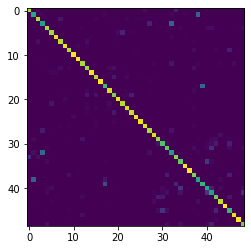

In [29]:
plt.imshow(N, interpolation='nearest')
#plt.xticks(np.arange(N.shape[0]),labels=np.arange(N.shape[0])+1)
#plt.yticks(np.arange(N.shape[1]),labels=np.arange(N.shape[1])+1)
plt.savefig('str_induced_heat_map.svg')
plt.show()

In [30]:
N.sum()

1.0

In [31]:
N.sum(axis=1)

array([0.02041844, 0.02030077, 0.02042102, 0.02026002, 0.02036599,
       0.02043638, 0.02048332, 0.02041738, 0.02045211, 0.02055745,
       0.02028098, 0.02019874, 0.02038522, 0.02041997, 0.02056635,
       0.0204252 , 0.02053006, 0.0204019 , 0.02036595, 0.02042225,
       0.02055664, 0.02042613, 0.02041865, 0.02042483, 0.02033163,
       0.02055686, 0.02041783, 0.02024482, 0.02024591, 0.02047727,
       0.02050726, 0.02043602, 0.02026561, 0.02041973, 0.02036488,
       0.02023377, 0.02038521, 0.0204865 , 0.02030405, 0.02040758,
       0.02037633, 0.02039053, 0.02052556, 0.02025902, 0.02044581,
       0.02051741, 0.02045376, 0.02063247, 0.02037843])

In [32]:
np.max(A)

99.80017852783203

In [15]:
N.sum(axis=0)

array([0.02039849, 0.02051457, 0.02039642, 0.02055806, 0.02045057,
       0.02038311, 0.02032994, 0.02040012, 0.02036207, 0.02026285,
       0.02053653, 0.02061786, 0.02042112, 0.02039845, 0.02025065,
       0.02039087, 0.02028628, 0.02042038, 0.0204513 , 0.02039344,
       0.02026067, 0.02038993, 0.02039822, 0.02039199, 0.02048401,
       0.02026029, 0.02040003, 0.0205716 , 0.02057051, 0.0203304 ,
       0.02030876, 0.02037573, 0.020548  , 0.02039769, 0.02045209,
       0.02058347, 0.02043047, 0.02033627, 0.02051532, 0.02041033,
       0.020441  , 0.02041864, 0.02028867, 0.02055811, 0.02037076,
       0.02029749, 0.02036188, 0.02018576, 0.02043883])

In [23]:
# Doubly-stochastic normalization [N]
jointPDF = N + 0.000000000000001 # Avoid 0s
marginals = np.outer(jointPDF.sum(axis=1),jointPDF.sum(axis=0))
mutual_info = np.sum(jointPDF*np.log2(jointPDF/marginals))
mutual_info/np.log2(49)

0.8460663397171779

In [24]:
# Alternative, naive normalization [A/A.sum()]
jointPDF = (A/A.sum()) + 0.000000000000001 # Avoid 0s
marginals = np.outer(jointPDF.sum(axis=1),jointPDF.sum(axis=0))
mutual_info = np.sum(jointPDF*np.log2(jointPDF/marginals))
mutual_info/np.log2(49)

0.7843190308305451